In [1]:
import pandas as pd
import numpy as np
import requests
import psycopg2
import json
import calendar
import time
import re
from dateutil.parser import parse
import matplotlib.pyplot as plt
import decimal
import sklearn

import boto3
import base64
from botocore.exceptions import ClientError

/anaconda3/lib/python3.7/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [2]:
#api_key = json.loads(get_key())['CCC_API']

In [3]:
"""secret = json.loads(get_secret())

engine = psycopg2.connect(
    database=secret["dbname"],
    user=secret["username"],
    password=secret["password"],
    host=secret["host"],
    port=secret["port"]
)"""

'secret = json.loads(get_secret())\n\nengine = psycopg2.connect(\n    database=secret["dbname"],\n    user=secret["username"],\n    password=secret["password"],\n    host=secret["host"],\n    port=secret["port"]\n)'

In [4]:
#cur = engine.cursor()
#print(cur.execute("select * from information_schema.tables"))

In [5]:
#s3 = boto3.client('s3')

In [6]:
#with open('target.csv', 'wb') as data:
#    s3.download_fileobj('ccc-waxler', 'consolidated_coin_data.csv', data)

In [7]:
df = pd.read_csv('consolidated_coin_data.csv')

In [8]:
df.head()

,Currency,Date,Open,High,Low,Close,Volume,Market Cap
0,ripple,24-Apr-19,0.321114,0.321282,0.296982,0.302318,"1,517,791,002","12,698,877,293"
1,ripple,23-Apr-19,0.323844,0.328396,0.320919,0.321222,"1,077,333,990","13,492,933,875"
2,ripple,22-Apr-19,0.322277,0.32935,0.320237,0.323934,"1,131,094,080","13,606,823,301"
3,ripple,21-Apr-19,0.328678,0.329627,0.318746,0.322449,"1,005,803,846","13,533,407,430"
4,ripple,20-Apr-19,0.331871,0.333213,0.324969,0.328476,"931,570,799","13,786,384,592"


In [9]:
df['Currency'].value_counts()

litecoin        2295
bitcoin         2295
ripple          2197
stellar         1831
tether          1622
ethereum        1464
eos              770
bitcoin-cash     748
binance-coin     746
cardano          678
Name: Currency, dtype: int64

In [10]:
df.loc[df['Currency'] == 'bitcoin']

,Currency,Date,Open,High,Low,Close,Volume,Market Cap
3392,bitcoin,24-Apr-19,5571.51,5642.04,5418.26,5464.87,"17,048,033,399","96,530,038,144"
3393,bitcoin,23-Apr-19,5399.37,5633.8,5389.41,5572.36,"15,867,308,108","98,417,387,004"
3394,bitcoin,22-Apr-19,5312.49,5422.69,5280.28,5399.37,"14,601,631,648","95,354,207,776"
3395,bitcoin,21-Apr-19,5335.88,5359.93,5257.34,5314.53,"13,731,844,223","93,847,052,256"
3396,bitcoin,20-Apr-19,5304.16,5358.49,5295.88,5337.89,"13,169,647,522","94,248,717,444"
3397,bitcoin,19-Apr-19,5298.15,5336.68,5233.34,5303.81,"13,780,238,655","93,638,345,002"
3398,bitcoin,18-Apr-19,5251.48,5319.99,5250.51,5298.39,"13,256,489,918","93,532,402,741"
3399,bitcoin,17-Apr-19,5236.14,5274.28,5219.21,5251.94,"12,438,480,677","92,702,617,458"
3400,bitcoin,16-Apr-19,5066.58,5238.95,5055.19,5235.56,"11,618,660,197","92,404,613,297"
3401,bitcoin,15-Apr-19,5167.32,5196.61,5024.07,5067.11,"12,290,155,061","89,422,237,603"


In [11]:
df['UnixDate'] = ""

In [12]:
parse(df['Date'][0]).date()

datetime.date(2019, 4, 24)

In [13]:
df['UnixDate'] = df['Date'].apply(lambda x : calendar.timegm(time.strptime(parse(x).date().strftime("%m-%d-%Y"), '%m-%d-%Y')))

In [14]:
df['Date'] = df['Date'].apply(lambda x : parse(x).date().strftime("%m-%d-%Y"))

In [15]:
df['Open'] = df['Open'].apply(lambda x : float(x.replace(',','')))

In [16]:
df['High'] = df['High'].apply(lambda x : float(x.replace(',','')))

In [17]:
df['Close'] = df['Close'].apply(lambda x : float(x.replace(',','')))

In [18]:
df['Low'] = df['Low'].apply(lambda x : float(x.replace(',','')))

In [19]:
df.head(50)

,Currency,Date,Open,High,Low,Close,Volume,Market Cap,UnixDate
0,ripple,04-24-2019,0.321114,0.321282,0.296982,0.302318,"1,517,791,002","12,698,877,293",1556064000
1,ripple,04-23-2019,0.323844,0.328396,0.320919,0.321222,"1,077,333,990","13,492,933,875",1555977600
2,ripple,04-22-2019,0.322277,0.329350,0.320237,0.323934,"1,131,094,080","13,606,823,301",1555891200
3,ripple,04-21-2019,0.328678,0.329627,0.318746,0.322449,"1,005,803,846","13,533,407,430",1555804800
4,ripple,04-20-2019,0.331871,0.333213,0.324969,0.328476,"931,570,799","13,786,384,592",1555718400
5,ripple,04-19-2019,0.337062,0.337147,0.329577,0.331902,"1,025,167,554","13,930,181,415",1555632000
6,ripple,04-18-2019,0.335476,0.345289,0.335335,0.337065,"1,092,731,769","14,146,855,828",1555545600
7,ripple,04-17-2019,0.327157,0.340327,0.322388,0.335453,"1,137,811,633","14,079,207,980",1555459200
8,ripple,04-16-2019,0.320998,0.327308,0.319261,0.327218,"799,796,781","13,733,570,917",1555372800
9,ripple,04-15-2019,0.328841,0.331551,0.318090,0.320913,"934,107,164","13,468,978,197",1555286400


In [20]:
df.groupby(df['Currency'])['Date'].min().sort_values()

Currency
bitcoin         01-01-2014
litecoin        01-01-2014
ripple          01-01-2014
stellar         01-01-2015
ethereum        01-01-2016
tether          01-01-2016
binance-coin    01-01-2018
bitcoin-cash    01-01-2018
cardano         01-01-2018
eos             01-01-2018
Name: Date, dtype: object

In [21]:
df_focus = df.loc[df['Currency'].isin(['ethereum','ripple','litecoin','bitcoin','stellar','cardano'])]

In [22]:
df_focus = df_focus.loc[df_focus['UnixDate'] > 1438905600]

In [23]:
df_focus.head()

,Currency,Date,Open,High,Low,Close,Volume,Market Cap,UnixDate
0,ripple,04-24-2019,0.321114,0.321282,0.296982,0.302318,"1,517,791,002","12,698,877,293",1556064000
1,ripple,04-23-2019,0.323844,0.328396,0.320919,0.321222,"1,077,333,990","13,492,933,875",1555977600
2,ripple,04-22-2019,0.322277,0.329350,0.320237,0.323934,"1,131,094,080","13,606,823,301",1555891200
3,ripple,04-21-2019,0.328678,0.329627,0.318746,0.322449,"1,005,803,846","13,533,407,430",1555804800
4,ripple,04-20-2019,0.331871,0.333213,0.324969,0.328476,"931,570,799","13,786,384,592",1555718400


In [24]:
df_focus['Currency'].value_counts()

litecoin    1463
ethereum    1463
ripple      1463
bitcoin     1463
stellar     1463
cardano      678
Name: Currency, dtype: int64

In [25]:
df_pivot = pd.pivot_table(df_focus, index=['UnixDate'], values='Open',columns='Currency',aggfunc='first')

In [26]:
df_pivot.count()

Currency
bitcoin     1463
cardano      678
ethereum    1463
litecoin    1463
ripple      1463
stellar     1463
dtype: int64

In [27]:
df_pivot.sort_values(by='UnixDate',ascending=False)

Currency,bitcoin,cardano,ethereum,litecoin,ripple,stellar
UnixDate,,,,,,
1565308800,11953.47,0.051910,220.910000,90.09,0.307567,0.076845
1565222400,11954.04,0.051906,226.520000,90.91,0.311785,0.078635
1565136000,11476.19,0.053374,225.930000,93.04,0.311492,0.078219
1565049600,11811.55,0.056652,234.250000,96.89,0.324018,0.082682
1564963200,10960.74,0.056270,222.650000,93.09,0.319723,0.082103
1564876800,10821.63,0.057770,222.580000,94.60,0.316862,0.082406
1564790400,10519.28,0.057417,217.900000,95.02,0.312506,0.081977
1564704000,10402.04,0.058864,217.880000,99.20,0.317809,0.083057
1564617600,10077.44,0.060160,218.550000,98.57,0.320734,0.083983


In [28]:
df_rec = df_pivot.loc[df_pivot.index.get_level_values(level = 'UnixDate') >= 1490832000] 

In [29]:
from sklearn import preprocessing
x = df_rec.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

In [31]:
df_rec.head()

Currency,bitcoin,cardano,ethereum,litecoin,ripple,stellar
UnixDate,,,,,,
1490832000,1042.21,NaN,53.12,4.18,0.010125,0.002022
1490918400,1026.64,NaN,51.75,7.02,0.013049,0.002270
1491004800,1071.71,NaN,50.03,6.65,0.021743,0.002349
1491091200,1080.61,NaN,50.74,6.86,0.021938,0.002607
1491177600,1102.95,NaN,48.82,7.74,0.060291,0.004118


In [32]:
df_norm = pd.DataFrame(x_scaled)
df_norm.columns = df_rec.columns
df_norm.index = df_rec.index

In [33]:
df_norm.head()

Currency,bitcoin,cardano,ethereum,litecoin,ripple,stellar
UnixDate,,,,,,
1490832000,0.000844,NaN,0.008350,0.000000,0.000000,0.000000
1490918400,0.000000,NaN,0.007339,0.008001,0.000873,0.000279
1491004800,0.002443,NaN,0.006071,0.006959,0.003468,0.000367
1491091200,0.002925,NaN,0.006594,0.007550,0.003526,0.000657
1491177600,0.004136,NaN,0.005178,0.010030,0.014975,0.002354


<Figure size 432x288 with 0 Axes>

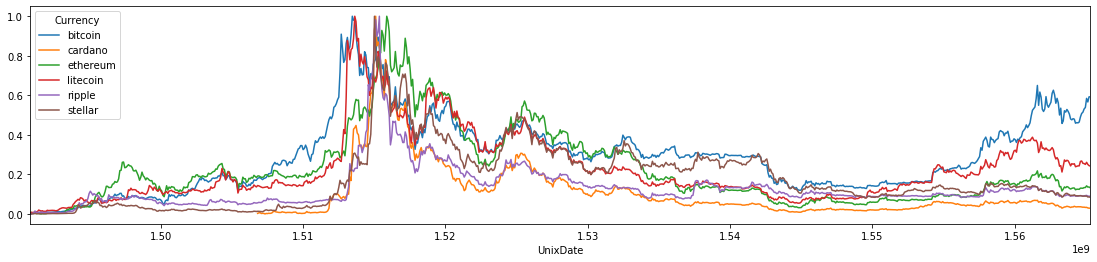

In [34]:
plt.figure()

df_norm.plot(figsize=(19,4))

<Figure size 432x288 with 0 Axes>

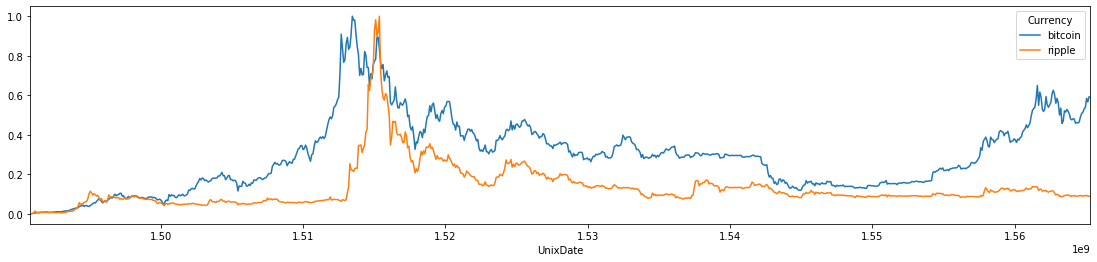

In [39]:
plt.figure()

df_norm[['bitcoin','ripple']].plot(figsize=(19,4))

In [41]:
df_norm.index

Int64Index([1490832000, 1490918400, 1491004800, 1491091200, 1491177600,
            1491264000, 1491350400, 1491436800, 1491523200, 1491609600,
            ...
            1564531200, 1564617600, 1564704000, 1564790400, 1564876800,
            1564963200, 1565049600, 1565136000, 1565222400, 1565308800],
           dtype='int64', name='UnixDate', length=863)

In [61]:
X = df_norm[['bitcoin','litecoin','ethereum']]
y = df_norm['ripple']

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1)

In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units=20, activation='relu', input_dim=3))
model.add(Dense(units=20, activation='relu'))
model.add(Dense(units=1, activation='softmax'))

In [64]:
model.compile(optimizer='adam', 
              loss='mean_squared_error', 
              metrics=['accuracy'])
model.fit(
    X_train,
    y_train,
    epochs=100,
    shuffle=True,
    verbose=0
)

In [65]:
model.fit(X_train, y_train, epochs=100)

Train on 647 samples
Epoch 1/100
647/647 [==============================] - 0s 33us/sample - loss: 0.7628 - accuracy: 0.0015
Epoch 2/100
647/647 [==============================] - 0s 31us/sample - loss: 0.7628 - accuracy: 0.0015
Epoch 3/100
647/647 [==============================] - 0s 37us/sample - loss: 0.7628 - accuracy: 0.0015
Epoch 4/100
647/647 [==============================] - 0s 29us/sample - loss: 0.7628 - accuracy: 0.0015
Epoch 5/100
647/647 [==============================] - 0s 32us/sample - loss: 0.7628 - accuracy: 0.0015
Epoch 6/100
647/647 [==============================] - 0s 33us/sample - loss: 0.7628 - accuracy: 0.0015
Epoch 7/100
647/647 [==============================] - 0s 27us/sample - loss: 0.7628 - accuracy: 0.0015
Epoch 8/100
647/647 [==============================] - 0s 36us/sample - loss: 0.7628 - accuracy: 0.0015
Epoch 9/100
647/647 [==============================] - 0s 35us/sample - loss: 0.7628 - accuracy: 0.0015
Epoch 10/100
647/647 [=====================

In [66]:
model.evaluate(X_test, y_test)

216/216 [==============================] - 0s 169us/sample - loss: 0.7738 - accuracy: 0.0000e+00


[0.7737812377788402, 0.0]

# LSTM

In [84]:
type(X_train.to_numpy())

numpy.ndarray

In [ ]:
X_train = np.reshape(X_train.to_numpy(), (X_train.to_numpy().shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test.to_numpy(), (X_test.to_numpy().shape[0], 1, X_test.shape[1]))

In [89]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

model2 = Sequential()
model2.add(layers.LSTM(20, input_shape=(1, 3), return_sequences=True))
model2.add(layers.LSTM(20))
model2.add(layers.Dense(1, activation='relu'))
model2.compile(optimizer="adam", loss="mean_squared_error")
model2.fit(X_train, y_train, epochs=50)
model2.evaluate(X_test, y_test)

Train on 647 samples
Epoch 1/50
647/647 [==============================] - 2s 3ms/sample - loss: 0.0266
Epoch 2/50
647/647 [==============================] - 0s 109us/sample - loss: 0.0159
Epoch 3/50
647/647 [==============================] - 0s 103us/sample - loss: 0.0115
Epoch 4/50
647/647 [==============================] - 0s 104us/sample - loss: 0.0101
Epoch 5/50
647/647 [==============================] - 0s 102us/sample - loss: 0.0085
Epoch 6/50
647/647 [==============================] - 0s 103us/sample - loss: 0.0068
Epoch 7/50
647/647 [==============================] - 0s 100us/sample - loss: 0.0057
Epoch 8/50
647/647 [==============================] - 0s 97us/sample - loss: 0.0050
Epoch 9/50
647/647 [==============================] - 0s 97us/sample - loss: 0.0048
Epoch 10/50
647/647 [==============================] - 0s 95us/sample - loss: 0.0049
Epoch 11/50
647/647 [==============================] - 0s 108us/sample - loss: 0.0046
Epoch 12/50
647/647 [==========================

0.002729001750358967